In [4]:
from utility import dse, parse_pickle, plot
import pickle
import matplotlib.pyplot as plt
import numpy as np

curves_highest_mean_single_fidelity = []
curves_highest_mean_random = []
curves_highest_mean_multi_fidelity = []

for cm in range(1):
    with open('./result/pickle/random_mean_cm{}_rt10_mr50.pickle'.format(cm), 'rb') as f:
        histories_random = pickle.load(f)

    with open('./result/pickle/multi_fidelity_mean_final_cm{}_rt10_mr100.pickle'.format(cm), 'rb') as f:
        histories_multi_fidelity = pickle.load(f)

    with open('./result/pickle/single_fidelity_mean_final_cm{}_rt10_mr50.pickle'.format(cm), 'rb') as f:
        histories_single_fidelity = pickle.load(f)

    points_multi_fidelity, curve_highest_mean_multi_fidelity, pareto_front_multi_fidelity, curve_highest_max_multi_fidelity, curve_highest_min_multi_fidelity = plot.get_highest_mean_curve(histories_multi_fidelity, strategy='multi_fidelity', iterations=200)
    points_single_fidelity, curve_highest_mean_single_fidelity, pareto_front_single_fidelity, curve_highest_max_single_fidelity, curve_highest_min_single_fidelity = plot.get_highest_mean_curve(histories_single_fidelity, strategy='single_fidelity', iterations=200)
    points_random, curve_highest_mean_random, pareto_front_random, curve_highest_max_random, curve_highest_min_random = plot.get_highest_mean_curve(histories_random, strategy='random', iterations=200)

    curves_highest_mean_single_fidelity.append(curve_highest_mean_single_fidelity)
    curves_highest_mean_random.append(curve_highest_mean_random)
    curves_highest_mean_multi_fidelity.append(curve_highest_mean_multi_fidelity)


2
2
2


In [2]:
pareto = []
for single_run in histories_random:
    for i in range(len(single_run)):
        non_dominated = True
        for j in range(len(single_run)):
            if single_run[j][-1][0] < single_run[i][-1][0] and single_run[j][-1][1] < single_run[i][-1][1]:
                non_dominated = False
        if non_dominated:
            pareto.append(single_run[i])

import pickle
with open('pareto.pickle', 'wb') as f:
    pickle.dump(pareto, f)



In [5]:
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('deep')
plt.figure(figsize=(10,6), tight_layout=True)

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

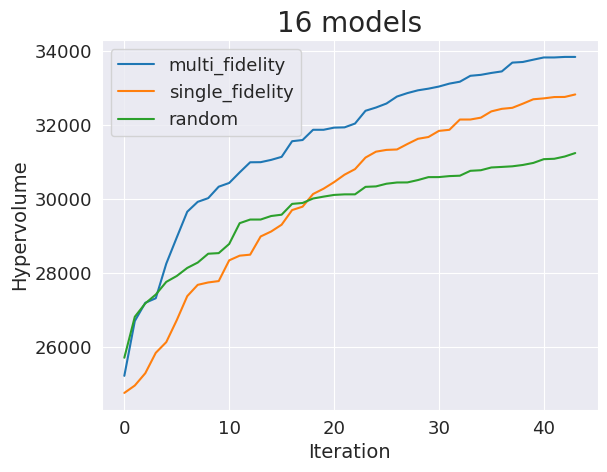

In [6]:

for cm in range(1):
    plt.plot(np.arange(len(curves_highest_mean_multi_fidelity[cm][6:])), curves_highest_mean_multi_fidelity[cm][6:], label='multi_fidelity')
    plt.plot(np.arange(len(curves_highest_mean_single_fidelity[cm][6:])), curves_highest_mean_single_fidelity[cm][6:], label='single_fidelity')
    plt.plot(np.arange(len(curves_highest_mean_random[cm][6:])), curves_highest_mean_random[cm][6:], label='random')

    # plt.plot(np.arange(len(curve_highest_max_multi_fidelity[6:])), curve_highest_max_multi_fidelity[6:], label='multi_fidelity_max')
    # plt.plot(np.arange(len(curve_highest_max_single_fidelity[6:])), curve_highest_max_single_fidelity[6:], label='single_fidelity_max')
    # plt.plot(np.arange(len(curve_highest_max_random[6:])), curve_highest_max_random[6:], label='random_max')

    # plt.plot(np.arange(len(curve_highest_min_multi_fidelity[6:])), curve_highest_min_multi_fidelity[6:], label='multi_fidelity_min')
    # plt.plot(np.arange(len(curve_highest_min_single_fidelity[6:])), curve_highest_min_single_fidelity[6:], label='single_fidelity_min')
    # plt.plot(np.arange(len(curve_highest_min_random[6:])), curve_highest_min_random[6:], label='random_min')

    plt.xlabel('Iteration')
    plt.ylabel('Hypervolume')
    plt.title('16 models'.format(cm))

    plt.legend()
    plt.savefig('result/picture/inference_of_gpt2'.format(cm))
    plt.show()

In [ ]:
run_time = 10

plt.scatter(-pareto_front_random[:, :, 0], pareto_front_random[:, :, 1], s=100, c='red', marker='o', label='Random')
# plt.scatter(-pareto_front_single_fidelity[run_time][:, 0], pareto_front_single_fidelity[run_time][:, 1], s=100, c='green', marker='o', label='Single Fidelity')
# plt.scatter(-pareto_front_multi_fidelity[run_time][:, 0], pareto_front_multi_fidelity[run_time][:, 1], s=100, c='blue', marker='o', label='multi Fidelity')

plt.xlabel('Thoughput')
plt.ylabel('Power')

plt.legend()
plt.show()

In [ ]:
run_time = 5

plt.scatter(-pareto_front_random[run_time][:, 0], pareto_front_random[run_time][:, 1], s=100, c='red', marker='o', label='Random')
plt.scatter(-pareto_front_single_fidelity[run_time][:, 0], pareto_front_single_fidelity[run_time][:, 1], s=100, c='green', marker='o', label='Single Fidelity')
plt.scatter(-pareto_front_multi_fidelity[run_time][:, 0], pareto_front_multi_fidelity[run_time][:, 1], s=100, c='blue', marker='o', label='multi Fidelity')
# points_random_ = points_random[points_random[:, :, 1] < 100]
# print(points_random_)

# plt.scatter(-points_random_[:, 0], points_random_[:, 1], s=100, c='red', marker='o', label='Random')
# plt.scatter(-points_single_fidelity[:, :, 0], points_single_fidelity[:, :, 1], s=100, c='green', marker='o', label='Single Fidelity')



plt.xlabel('Thoughput')
plt.ylabel('Power')

plt.legend()
plt.show()